# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

import os
os.chdir(r'C:\Users\shubh\Downloads\EDA Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

In [ ]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Going to keep the below code in hashtags as every time I run this notebook, this column will run as well and it will take at least 40-45 minutes leading to unnecessary wait time. Instead, I will access the final_data.csv file directly that I have obtained after sampling for ease.

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files

# Select the folder having data files
## os.chdir(r'C:\Users\shubh\Downloads\EDA Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
## file_list = os.listdir()

# initialise an empty dataframe
## df = pd.DataFrame()


# iterate through the list of files and sample one by one:
## for file_name in file_list:
    #try:
        # file path for the current file
       # file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        #data = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        #data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
        #sampled_data = pd.DataFrame()
        #data['date'] = data['tpep_pickup_datetime'].dt.date
        #data['hour'] = data['tpep_pickup_datetime'].dt.hour
        #unique_date_hours = data[['date', 'hour']].drop_duplicates()

        # Loop through dates and then loop through every hour of each date
        # Iterate through each hour of the selected date
        #for _, row in unique_date_hours.iterrows():
        #   date, hour = row['date'], row['hour']
        #   hour_data = data[(data['date'] == date) & (data['hour'] == hour)]

            # Sample 5% of the hourly data randomly
         #   if not hour_data.empty:
          #      sample = hour_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
           #     sampled_data = pd.concat([sampled_data, sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        #df = pd.concat([df, sampled_data])

    #except Exception as e:
   #     print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
### The sampling fraction provided still gave a large dataset. Adjusting it to 300,000 records

In [ ]:
#if len(df) > 300000:
 #   df = df.sample(n=300000, random_state=42)
#else:
 #   df = df.groupby(df['tpep_pickup_datetime'].dt.hour, group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

#df.to_csv("final_data.csv", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file

df = pd.read_csv('final_data.csv')

In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-05-11 22:02:30   2023-05-11 22:10:33              1.0   
1         2  2023-11-04 22:05:35   2023-11-04 22:11:50              2.0   
2         2  2023-09-01 10:47:28   2023-09-01 11:11:44              1.0   
3         1  2023-10-04 11:20:04   2023-10-04 11:44:14              1.0   
4         2  2023-01-18 11:24:32   2023-01-18 11:37:42              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.17         1.0                  N           142           230   
1           1.21         1.0                  N            48           246   
2           5.41         1.0                  N           138           202   
3           4.30         1.0                  N           107            75   
4           1.17         1.0                  N           238           239   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        4.29           0.0   
1             1  ...      0.5        2.72           0.0   
2             1  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             1  ...      0.5        4.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         18.59                   2.5          NaN   
1                    1.0         16.32                   2.5          NaN   
2                    1.0         35.75                   0.0          NaN   
3                    1.0         25.90                   2.5          NaN   
4                    1.0         21.00                   2.5          0.0   

         date  hour Airport_fee  
0  2023-05-11    22        0.00  
1  2023-11-04    22        0.00  
2  2023-09-01    10        1.75  
3  2023-10-04    11        0.00  
4  2023-01-18    11         NaN  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289694 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289694 non-null  float64
 6   store_and_fwd_flag     289694 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

df['fee_airport'] = df[['airport_fee' , 'Airport_fee']].sum(axis=1, min_count=1)
df1= df.drop(columns= ['airport_fee', 'Airport_fee'], axis=1)
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-05-11 22:02:30   2023-05-11 22:10:33              1.0   
1         2  2023-11-04 22:05:35   2023-11-04 22:11:50              2.0   
2         2  2023-09-01 10:47:28   2023-09-01 11:11:44              1.0   
3         1  2023-10-04 11:20:04   2023-10-04 11:44:14              1.0   
4         2  2023-01-18 11:24:32   2023-01-18 11:37:42              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.17         1.0                  N           142           230   
1           1.21         1.0                  N            48           246   
2           5.41         1.0                  N           138           202   
3           4.30         1.0                  N           107            75   
4           1.17         1.0                  N           238           239   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        4.29           0.0   
1             1  ...    1.0      0.5        2.72           0.0   
2             1  ...    5.0      0.5        0.00           0.0   
3             2  ...    2.5      0.5        0.00           0.0   
4             1  ...    0.0      0.5        4.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge        date hour  \
0                    1.0         18.59                   2.5  2023-05-11   22   
1                    1.0         16.32                   2.5  2023-11-04   22   
2                    1.0         35.75                   0.0  2023-09-01   10   
3                    1.0         25.90                   2.5  2023-10-04   11   
4                    1.0         21.00                   2.5  2023-01-18   11   

   fee_airport  
0         0.00  
1         0.00  
2         1.75  
3         0.00  
4         0.00  

[5 rows x 21 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

df1.fare_amount[df.fare_amount < 0]  #No negative values found.

Series([], Name: fare_amount, dtype: float64)

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

df1["RatecodeID"][df1["fare_amount"] <0].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
# Find which columns have negative values

df1.select_dtypes(include=["number"]).lt(0).sum()

VendorID                  0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     1
mta_tax                  12
tip_amount                0
tolls_amount              0
improvement_surcharge    13
total_amount             13
congestion_surcharge     12
hour                      0
fee_airport               1
dtype: int64

In [ ]:
# fix these negative values

df1[['extra','mta_tax','improvement_surcharge','total_amount','congestion_surcharge','fee_airport']] = df1[['extra','mta_tax','improvement_surcharge','total_amount','congestion_surcharge','fee_airport']].apply(lambda x : abs (x))
df1.select_dtypes(include=["number"]).lt(0).sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
hour                     0
fee_airport              0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

df1.isnull().sum() / len(df1) * 100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.435333
trip_distance            0.000000
RatecodeID               3.435333
store_and_fwd_flag       3.435333
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.435333
date                     0.000000
hour                     0.000000
fee_airport              3.435333
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df1[df1['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5              2  2023-12-14 20:03:44   2023-12-14 20:17:38              NaN   
19             2  2023-03-17 22:46:36   2023-03-17 23:13:57              NaN   
39             1  2023-11-04 17:54:47   2023-11-04 18:11:13              NaN   
60             1  2023-11-27 09:25:44   2023-11-27 09:43:00              NaN   
138            1  2023-12-07 10:49:14   2023-12-07 11:01:02              NaN   
...          ...                  ...                   ...              ...   
299907         1  2023-11-12 18:30:59   2023-11-12 19:02:52              NaN   
299962         1  2023-12-15 14:44:51   2023-12-15 14:50:28              NaN   
299973         1  2023-04-27 11:56:11   2023-04-27 12:05:15              NaN   
299979         1  2023-02-02 06:57:39   2023-02-02 07:04:36              NaN   
299988         6  2023-06-05 05:06:29   2023-06-05 06:06:57              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
5                1.26         NaN                NaN           170   
19               7.99         NaN                NaN           230   
39               1.50         NaN                NaN           161   
60               3.20         NaN                NaN           161   
138              1.00         NaN                NaN           140   
...               ...         ...                ...           ...   
299907           0.00         NaN                NaN           144   
299962           0.00         NaN                NaN            87   
299973           1.30         NaN                NaN           236   
299979           1.40         NaN                NaN           161   
299988          18.49         NaN                NaN           265   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
5                234             0  ...    0.0      0.5        0.00   
19                33             0  ...    0.0      0.5        7.48   
39               140             0  ...    0.0      0.5        1.96   
60               231             0  ...    0.0      0.5        3.36   
138              141             0  ...    0.0      0.5        2.80   
...              ...           ...  ...    ...      ...         ...   
299907            48             0  ...    0.0      0.5        0.00   
299962           209             0  ...    0.0      0.5        0.00   
299973           239             0  ...    0.0      0.5        1.40   
299979           237             0  ...    0.0      0.5        2.00   
299988            65             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
5                0.0                    1.0         29.71   
19               0.0                    1.0         44.89   
39               0.0                    1.0         21.56   
60               0.0                    1.0         25.76   
138              0.0                    1.0         16.80   
...              ...                    ...           ...   
299907           0.0                    1.0         31.69   
299962           0.0                    1.0         13.33   
299973           0.0                    1.0         15.40   
299979           0.0                    1.0         15.30   
299988           0.0                    0.3         54.38   

        congestion_surcharge        date hour  fee_airport  
5                        NaN  2023-12-14   20          NaN  
19                       NaN  2023-03-17   22          NaN  
39                       NaN  2023-11-04   17          NaN  
60                       NaN  2023-11-27    9          NaN  
138                      NaN  2023-12-07   10          NaN  
...                      ...         ...  ...          ...  
299907                   NaN  2023-11-12   18          NaN  
299962                   NaN  2023-12-15   14          NaN  
299973                   NaN  2023-04-27   11          NaN  
299979    

In [ ]:
df1.passenger_count.describe()

count    289694.000000
mean          1.369072
std           0.893646
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: passenger_count, dtype: float64

<Axes: ylabel='passenger_count'>

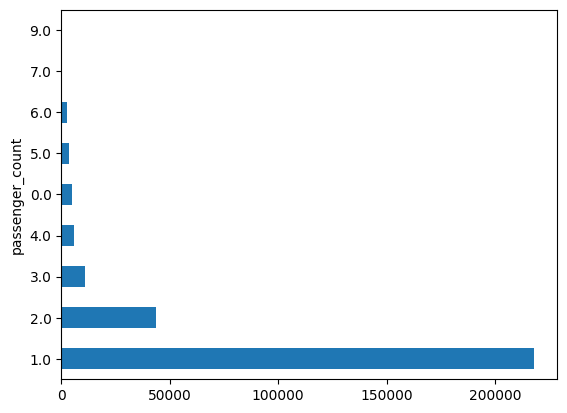

In [ ]:
df1.passenger_count.value_counts().plot.barh()

In [ ]:
df1.passenger_count = df1.passenger_count.fillna(1) #Imputed the NaN values with the mode
df1.passenger_count = df1.passenger_count.replace(0,1)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'

df1.RatecodeID.value_counts(normalize = True)

RatecodeID
1.0     0.945101
2.0     0.038703
99.0    0.005440
5.0     0.005395
3.0     0.003324
4.0     0.002033
6.0     0.000003
Name: proportion, dtype: float64

In [ ]:
df1.RatecodeID = df1.RatecodeID.fillna(1.0)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

df1.congestion_surcharge.value_counts(normalize=True)

congestion_surcharge
2.5    0.923847
0.0    0.076153
Name: proportion, dtype: float64

In [ ]:
df1.congestion_surcharge = df1.congestion_surcharge.fillna(2.5)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
df1.fee_airport = df1.fee_airport.fillna(df1.fee_airport.median())
df1.store_and_fwd_flag = df1.store_and_fwd_flag.fillna('N')

In [ ]:
# Handle any remaining missing values
df1.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
fee_airport              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df1.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  300000.000000    300000.000000  300000.000000  300000.000000   
mean        1.732320         1.372207       3.741594       1.585367   
std         0.447617         0.865073      71.319923       7.089559   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         9.000000   30430.040000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      165.229823     164.133793       1.162497      19.792022   
std        63.975962      69.676695       0.505106      18.182346   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     728.900000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        1.595084       0.495406       3.543851       0.592079   
std         1.839276       0.047768       4.045906       2.175741   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        12.500000       0.800000     200.000000      95.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          300000.000000  300000.000000         300000.000000   
mean                0.999113      28.853332              2.316158   
std                 0.027374      22.724425              0.652540   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     762.450000              2.500000   

                hour    fee_airport  
count  300000.000000  300000.000000  
mean       14.267977       0.137956  
std         5.807368       0.457621  
min         0.000000       0.000000  
25%        11.000000       0.000000  
50%        15.000000       0.000000  
75%        19.000000       0.000000  
max        23.000000       1.750000

In [ ]:
df1[(df1['trip_distance'] < 0.1) & (df1['fare_amount'] > 300)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
69462          2  2023-06-20 15:38:20   2023-06-20 15:38:30              1.0   
107445         2  2023-08-13 18:44:08   2023-08-13 18:44:22              4.0   
143924         1  2023-01-11 12:38:54   2023-01-11 12:38:54              1.0   
179424         2  2023-05-19 21:04:06   2023-05-19 21:04:22              2.0   
217434         1  2023-06-24 19:41:42   2023-06-24 19:43:18              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
69462             0.0         5.0                  N           132   
107445            0.0         5.0                  N           265   
143924            0.0        99.0                  N           264   
179424            0.0         5.0                  N           265   
217434            0.0         5.0                  N           164   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
69462            132             1  ...    0.0      0.0        70.2   
107445           265             3  ...    0.0      0.0         0.0   
143924           264             1  ...    0.0      0.0         0.0   
179424           265             1  ...    0.0      0.0         0.0   
217434           164             1  ...    0.0      0.0         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
69462            0.0                    1.0        422.95   
107445           0.0                    1.0        501.00   
143924           0.0                    0.0        450.00   
179424           0.0                    1.0        319.00   
217434           0.0                    1.0        401.00   

        congestion_surcharge        date hour  fee_airport  
69462                    0.0  2023-06-20   15         1.75  
107445                   0.0  2023-08-13   18         0.00  
143924                   0.0  2023-01-11   12         0.00  
179424                   0.0  2023-05-19   21         0.00  
217434                   0.0  2023-06-24   19         0.00  

[5 rows x 21 columns]

In [ ]:
df1[(df1["trip_distance"] == 0) & (df1["fare_amount"] == 0) & (df1["PULocationID"] != df1["DOLocationID"])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
58009          1  2023-05-07 00:19:52   2023-05-07 00:19:52              2.0   
61037          1  2023-11-08 15:29:15   2023-11-08 15:29:47              1.0   
68061          1  2023-10-25 09:26:51   2023-10-25 09:43:58              1.0   
71276          1  2023-10-21 02:43:51   2023-10-21 02:43:51              1.0   
102208         1  2023-11-07 08:42:41   2023-11-07 08:42:41              1.0   
103849         1  2023-11-22 05:13:37   2023-11-22 05:40:20              1.0   
189300         2  2023-04-24 12:48:38   2023-04-24 12:48:44              1.0   
194784         1  2023-12-20 13:40:27   2023-12-20 13:40:27              1.0   
213611         1  2023-04-23 17:45:49   2023-04-23 17:45:49              1.0   
242906         1  2023-05-02 17:42:04   2023-05-02 17:42:04              1.0   
276143         1  2023-10-03 09:03:22   2023-10-03 09:30:54              1.0   
281710         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
58009             0.0         5.0                  N            75   
61037             0.0         1.0                  N           164   
68061             0.0         1.0                  N            68   
71276             0.0         5.0                  Y           265   
102208            0.0         1.0                  N           237   
103849            0.0         1.0                  N           167   
189300            0.0         5.0                  N           140   
194784            0.0         5.0                  Y           138   
213611            0.0         1.0                  N           132   
242906            0.0         5.0                  N            75   
276143            0.0         1.0                  N           262   
281710            0.0         2.0                  N           107   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
58009            264             2  ...   0.00      0.0         0.0   
61037            161             1  ...   0.00      0.0         0.0   
68061            246             0  ...   0.00      0.0         0.0   
71276            264             2  ...   0.00      0.0         0.0   
102208           264             2  ...   0.00      0.0         0.0   
103849           137             1  ...   0.00      0.0         0.0   
189300             7             2  ...   0.00      0.0         0.0   
194784           264             2  ...   9.25      0.0         0.0   
213611           264             3  ...   0.00      0.0         0.0   
242906           264             2  ...   0.00      0.0         0.0   
276143           230             0  ...   0.00      0.0         0.0   
281710           137             2  ...   0.00      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
58009            0.0                    0.0          0.00   
61037            0.0                    0.0          0.00   
68061            0.0                    0.0          0.00   
71276            0.0                    0.0          0.00   
102208           0.0                    0.0          0.00   
103849           0.0                    0.0          0.00   
189300           0.0                    1.0          3.50   
194784           0.0                    1.0         10.25   
213611           0.0                    0.0          0.00   
242906           0.0                    0.0          0.00   
276143           0.0                    0.0          2.00   
281710           0.0                    1.0          4.00   

        congestion_surcharge        date hour  fee_airport  
58009                    0.0  2023-05-07    0         0.00  
61037                    0.0  2023-11-08   15         0.00  
68061                    2.5  2023-10-25    9         0.00  
71276                    0.0  2023-10-21    2         0.00  
102208                   0.0  202

In [ ]:
df1[df1.trip_distance > 250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
24559          2  2023-03-30 14:07:00   2023-03-30 15:32:00              1.0   
134309         2  2023-07-10 17:33:19   2023-07-10 19:14:56              1.0   
141464         2  2023-07-12 21:05:00   2023-07-12 21:10:00              1.0   
169321         1  2023-12-27 06:00:00   2023-12-27 07:22:13              1.0   
171004         2  2023-05-08 15:22:51   2023-05-08 16:02:16              1.0   
210734         2  2023-02-10 19:53:45   2023-02-10 20:01:48              2.0   
213480         2  2023-03-03 19:47:00   2023-03-03 20:05:00              1.0   
215705         2  2023-10-30 07:13:00   2023-10-30 07:33:00              1.0   
229111         2  2023-07-13 15:38:02   2023-07-13 16:09:33              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
24559        12133.27         1.0                  N            50   
134309        9717.11         1.0                  N           216   
141464       30430.04         1.0                  N           263   
169321         969.10        99.0                  N           258   
171004        9678.97         1.0                  N           138   
210734        9673.76         1.0                  N           264   
213480        7094.16         1.0                  N            75   
215705        4547.48         1.0                  N           143   
229111        9679.36         1.0                  N           138   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
24559            132             0  ...    0.0      0.5       16.20   
134309           265             4  ...    2.5      0.5        0.00   
141464           263             0  ...    0.0      0.5        0.00   
169321           265             1  ...    0.0      0.5        0.00   
171004           161             1  ...    0.0      0.5        2.39   
210734           142             1  ...    2.5      0.5        1.50   
213480            42             0  ...    0.0      0.5        0.00   
215705           136             0  ...    0.0      0.5        4.05   
229111           234             1  ...    5.0      0.5       10.00   

        tolls_amount  improvement_surcharge  total_amount  \
24559           0.00                    1.0         97.20   
134309          0.00                    1.0        271.30   
141464          0.00                    1.0         27.01   
169321          0.00                    1.0         27.00   
171004          6.55                    1.0         57.94   
210734          0.00                    1.0         16.60   
213480          0.00                    1.0         20.31   
215705          0.00                    1.0         44.52   
229111          6.55                    1.0         67.40   

        congestion_surcharge        date hour  fee_airport  
24559                    2.5  2023-03-30   14         0.00  
134309                   2.5  2023-07-10   17         0.00  
141464                   2.5  2023-07-12   21         0.00  
169321                   0.0  2023-12-27    6         0.00  
171004                   2.5  2023-05-08   15         0.00  
210734                   2.5  2023-02-10   19         0.00  
213480                   2.5  2023-03-03   19         0.00  
215705                   2.5  2023-10-30    7         0.00  
229111                   2.5  2023-07-13   15         1.75  

[9 rows x 21 columns]

In [ ]:
df1[df1.payment_type==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5              2  2023-12-14 20:03:44   2023-12-14 20:17:38              1.0   
19             2  2023-03-17 22:46:36   2023-03-17 23:13:57              1.0   
39             1  2023-11-04 17:54:47   2023-11-04 18:11:13              1.0   
60             1  2023-11-27 09:25:44   2023-11-27 09:43:00              1.0   
138            1  2023-12-07 10:49:14   2023-12-07 11:01:02              1.0   
...          ...                  ...                   ...              ...   
299907         1  2023-11-12 18:30:59   2023-11-12 19:02:52              1.0   
299962         1  2023-12-15 14:44:51   2023-12-15 14:50:28              1.0   
299973         1  2023-04-27 11:56:11   2023-04-27 12:05:15              1.0   
299979         1  2023-02-02 06:57:39   2023-02-02 07:04:36              1.0   
299988         6  2023-06-05 05:06:29   2023-06-05 06:06:57              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
5                1.26         1.0                  N           170   
19               7.99         1.0                  N           230   
39               1.50         1.0                  N           161   
60               3.20         1.0                  N           161   
138              1.00         1.0                  N           140   
...               ...         ...                ...           ...   
299907           0.00         1.0                  N           144   
299962           0.00         1.0                  N            87   
299973           1.30         1.0                  N           236   
299979           1.40         1.0                  N           161   
299988          18.49         1.0                  N           265   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
5                234             0  ...    0.0      0.5        0.00   
19                33             0  ...    0.0      0.5        7.48   
39               140             0  ...    0.0      0.5        1.96   
60               231             0  ...    0.0      0.5        3.36   
138              141             0  ...    0.0      0.5        2.80   
...              ...           ...  ...    ...      ...         ...   
299907            48             0  ...    0.0      0.5        0.00   
299962           209             0  ...    0.0      0.5        0.00   
299973           239             0  ...    0.0      0.5        1.40   
299979           237             0  ...    0.0      0.5        2.00   
299988            65             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
5                0.0                    1.0         29.71   
19               0.0                    1.0         44.89   
39               0.0                    1.0         21.56   
60               0.0                    1.0         25.76   
138              0.0                    1.0         16.80   
...              ...                    ...           ...   
299907           0.0                    1.0         31.69   
299962           0.0                    1.0         13.33   
299973           0.0                    1.0         15.40   
299979           0.0                    1.0         15.30   
299988           0.0                    0.3         54.38   

        congestion_surcharge        date hour  fee_airport  
5                        2.5  2023-12-14   20          0.0  
19                       2.5  2023-03-17   22          0.0  
39                       2.5  2023-11-04   17          0.0  
60                       2.5  2023-11-27    9          0.0  
138                      2.5  2023-12-07   10          0.0  
...                      ...         ...  ...          ...  
299907                   2.5  2023-11-12   18          0.0  
299962                   2.5  2023-12-15   14          0.0  
299973                   2.5  2023-04-27   11          0.0  
299979    

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6

df1 = df1.drop(df1[df1['passenger_count'] > 6].index)

In [ ]:
# Continue with outlier handling

df1 = df1.drop(df1[(df1['trip_distance'] < 0.1) & (df1['fare_amount'] > 300)].index)
df1 = df1.drop(df1[(df1["trip_distance"] == 0) & (df1["fare_amount"] == 0) & (df1["PULocationID"] != df1["DOLocationID"])].index)
df1 = df1.drop(df1[df1.trip_distance > 250].index)
df1 = df1.drop(df1[df1.fare_amount > 500].index)

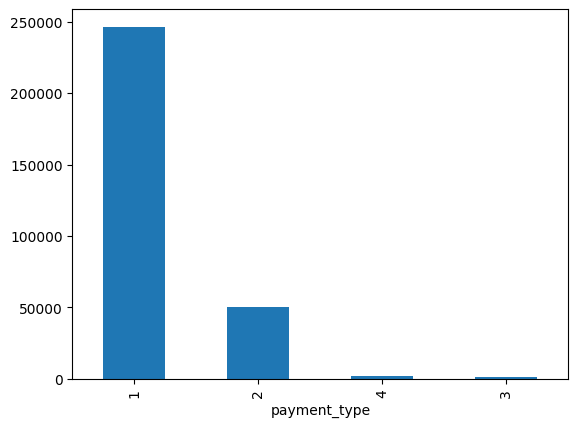

In [ ]:
# Do any columns need standardising?

df1.payment_type.value_counts().plot.bar()
plt.savefig('payment_type.png')

In [ ]:
df1.payment_type.replace(0,1, inplace=True)

<Axes: >

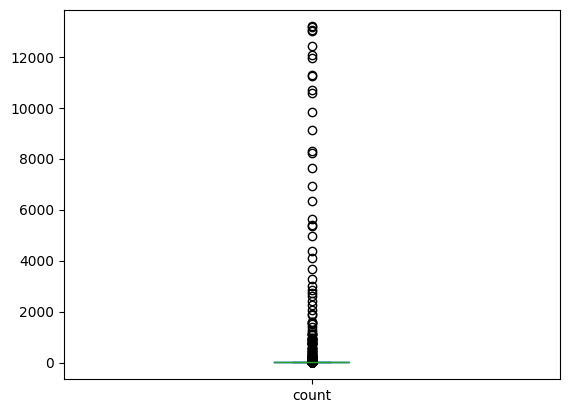

In [ ]:
df1.fare_amount.value_counts().plot.box()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour',
 'Airport_fee',
 'fee_airport']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

**Numerical** :

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

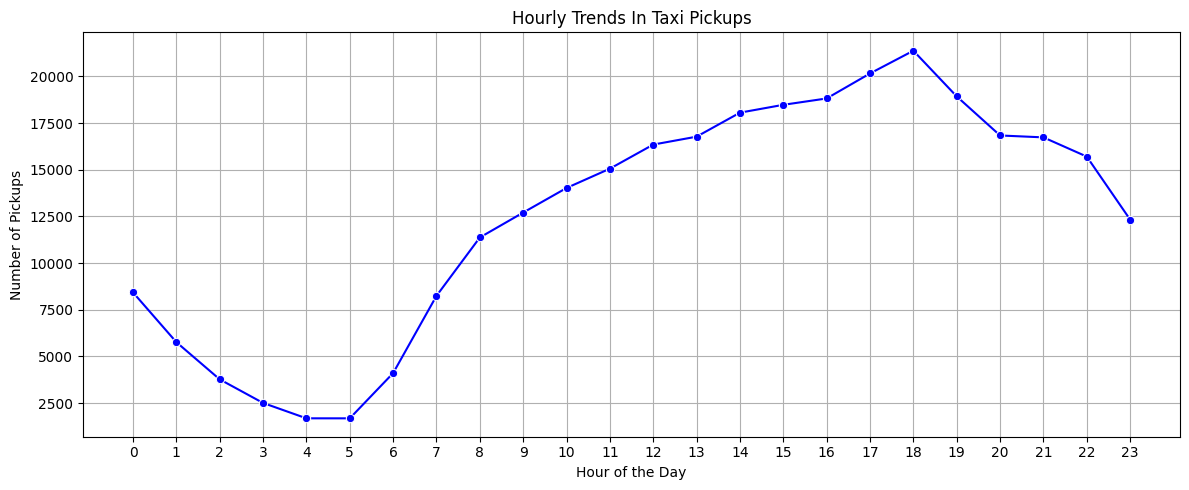

In [ ]:
# Find and show the hourly trends in taxi pickups

import datetime
df1.tpep_pickup_datetime = pd.to_datetime(df1['tpep_pickup_datetime'])
df1.tpep_dropoff_datetime = pd.to_datetime(df1['tpep_dropoff_datetime'])
hourly_trends = df1.groupby("hour").size()
plt.figure(figsize=(12,5))
sns.lineplot(data = hourly_trends, marker= "o", linestyle = '-', color = 'b')
plt.title("Hourly Trends In Taxi Pickups")
plt.grid(True)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig('Hourly Trends In Taxi Pickups.png')

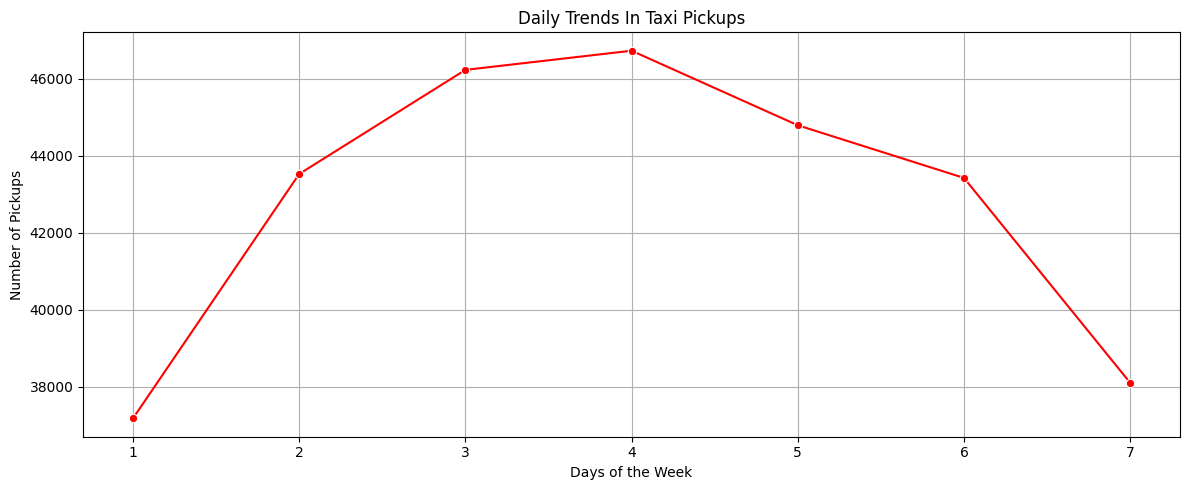

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

df1['days'] = df1['tpep_pickup_datetime'].dt.dayofweek + 1
daily_trend = df1.groupby('days').size()
plt.figure(figsize=(12,5))
sns.lineplot(data = daily_trend, marker= "o", linestyle = '-', color = 'r')
plt.title("Daily Trends In Taxi Pickups")
plt.grid(True)
plt.xlabel("Days of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(range(1, 8))
plt.tight_layout()
plt.savefig('Daily Trends In Taxi Pickups.png')

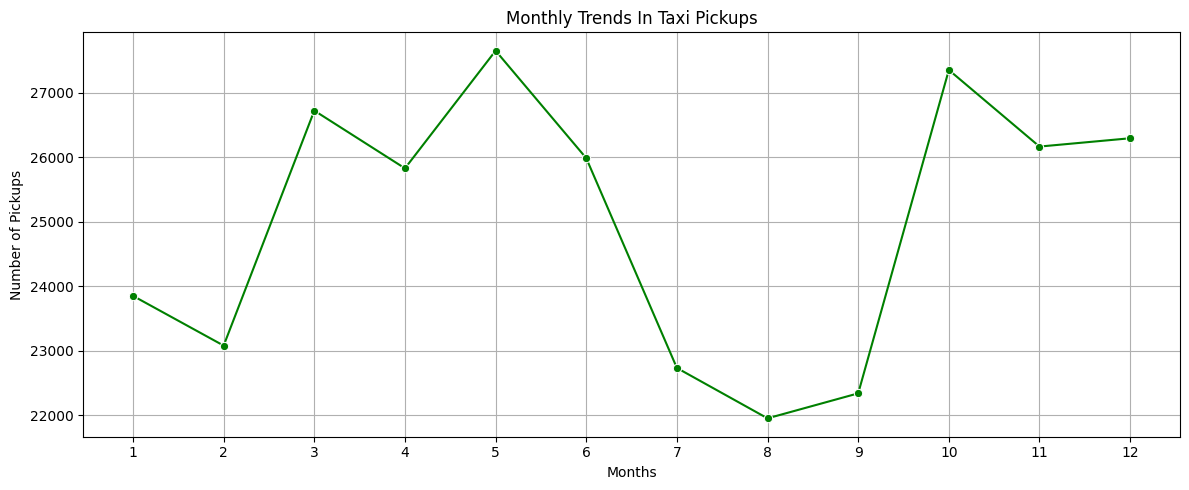

In [ ]:
# Show the monthly trends in pickups

df1['month'] = df1['tpep_pickup_datetime'].dt.month
monthly_trend = df1.groupby('month').size()
plt.figure(figsize=(12,5))
sns.lineplot(data = monthly_trend, marker= "o", linestyle = '-', color = 'g')
plt.title("Monthly Trends In Taxi Pickups")
plt.grid(True)
plt.xlabel("Months")
plt.ylabel("Number of Pickups")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.savefig('Monthly Trends In Taxi Pickups.png')

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

df_fare_amount = df1[~(df1['fare_amount'] ==0)]
df_total_amount = df_fare_amount[~(df_fare_amount['total_amount'] ==0)]
df_non_zero = df_total_amount[~((df_total_amount['trip_distance'] == 0) & (df_total_amount['PULocationID'] != df_total_amount['DOLocationID']))]

# Dropping entries were trip_distance = 0 but PULocationID and DOLocationID are not same.
# tip_amount should remain, since tipping is optional and for tip_amount == 0, there is total amount present. There are way too many entries for the same.

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

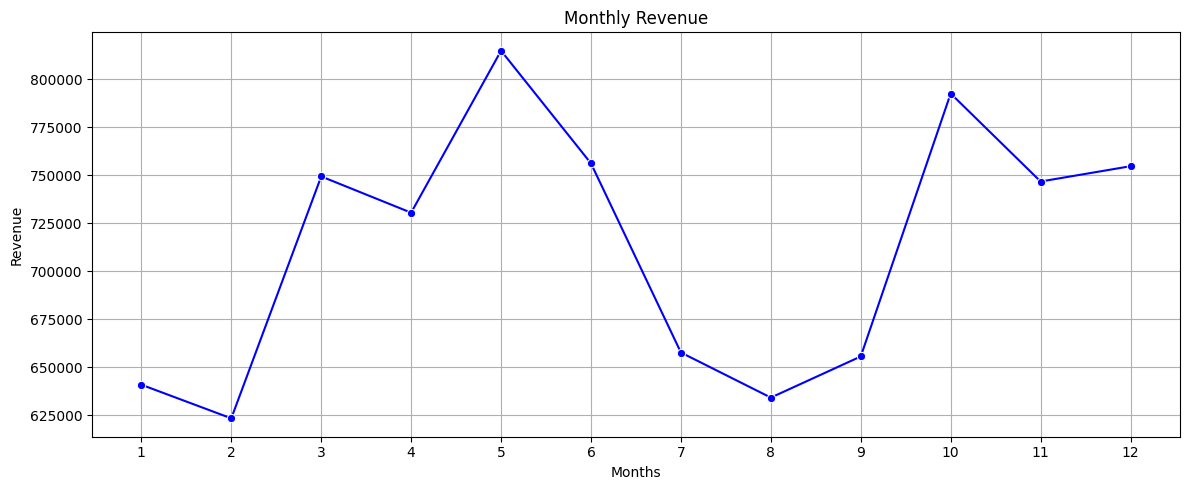

In [ ]:
# Group data by month and analyse monthly revenue

monthly_revenue = df_non_zero.groupby("month")['total_amount'].sum()
plt.figure(figsize=(12,5))
sns.lineplot(data = monthly_revenue, marker= "o", linestyle = '-', color = 'b')
plt.title("Monthly Revenue")
plt.grid(True)
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.savefig('Monthly Revenue.png')

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

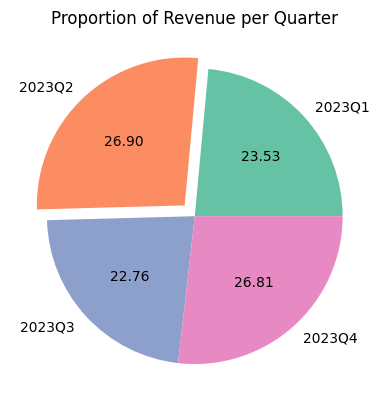

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate proportion of each quarter

df_non_zero['quarter'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('Q')
quaterly_trend = df_non_zero.groupby('quarter')['total_amount'].sum()
plt.pie(quaterly_trend, labels= quaterly_trend.keys(), autopct= '%.2f', colors=['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3'], explode=(0,.1,0,0))
plt.title('Proportion of Revenue per Quarter')
plt.show()
plt.savefig('Revenue_per_Quarter.png')

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

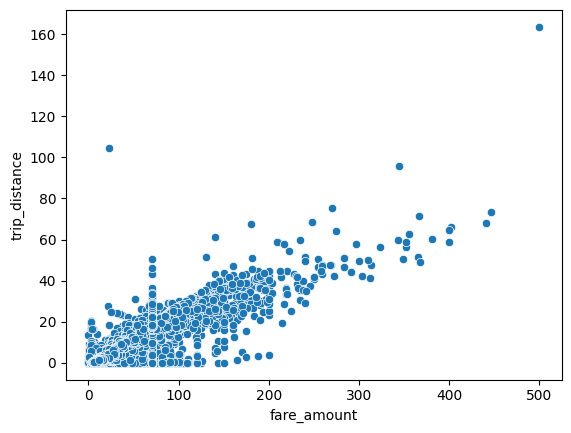


               trip_distance  fare_amount
trip_distance           1.00         0.94
fare_amount             0.94         1.00

The correlation value between 'trip_distance' and 'fare_amount' is 0.94.


<Figure size 640x480 with 0 Axes>

In [ ]:
# Show how trip fare is affected by distance

dist_fare_plot = df_non_zero[['trip_distance', 'fare_amount']]
dist_fare_plot = dist_fare_plot[dist_fare_plot['trip_distance'] != 0]
sns.scatterplot(data=dist_fare_plot, x = 'fare_amount', y = 'trip_distance')
plt.show()
plt.savefig('Relationship-trip distance and fare.png')
print()
correlation_value = dist_fare_plot.corr().round(2)
print(correlation_value)
print(f"\nThe correlation value between 'trip_distance' and 'fare_amount' is 0.94.")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

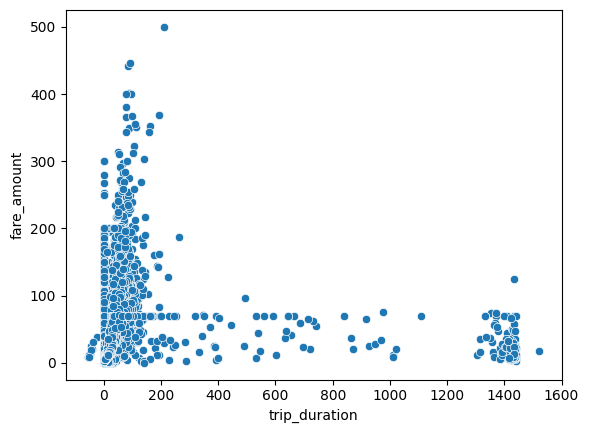



The correlation value is 0.27.


In [ ]:
# Show relationship between fare and trip duration

df_non_zero['trip_duration'] = df_non_zero['tpep_dropoff_datetime'] - df_non_zero['tpep_pickup_datetime']
df_non_zero['trip_duration'] = df_non_zero['trip_duration'].dt.total_seconds()/60
df_non_zero = df_non_zero.drop(df_non_zero[df_non_zero['trip_duration']>5000].index)
duration_fare_plot = df_non_zero[['trip_duration', 'fare_amount']]
sns.scatterplot(data=duration_fare_plot, x = 'trip_duration', y = 'fare_amount')
plt.show()
print()
corr2 = duration_fare_plot.corr().round(2)
print(f"\nThe correlation value is 0.27.")

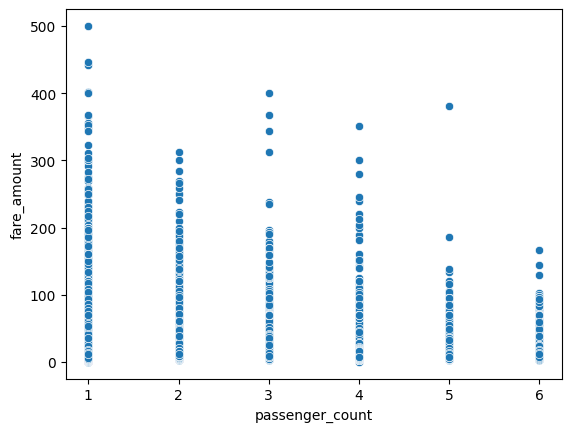



The correlation value is 0.04.


In [ ]:
# Show relationship between fare and number of passengers

nop_fare_plot = df_non_zero[['passenger_count', 'fare_amount']]
sns.scatterplot(data=nop_fare_plot, x = 'passenger_count', y = 'fare_amount')
plt.show()
print()
corr3 = nop_fare_plot.corr().round(2)
print(f"\nThe correlation value is 0.04.")

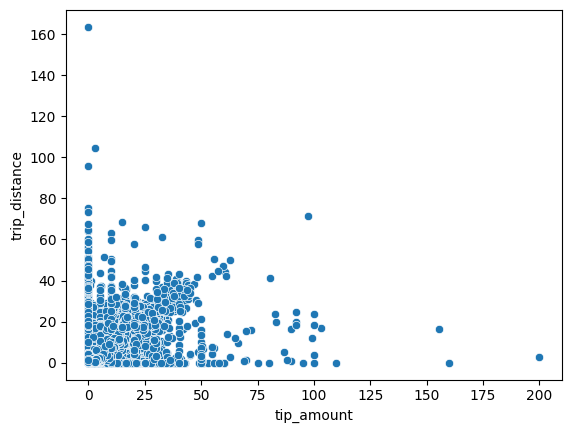



The correlation value is 0.57.


In [ ]:
# Show relationship between tip and trip distance

df_tip_trip = df_non_zero[['tip_amount', 'trip_distance']]
sns.scatterplot(data=df_tip_trip, x = 'tip_amount', y = 'trip_distance')
plt.show()
print()
corr4 = df_tip_trip.corr().round(2)
print(f"\nThe correlation value is 0.57.")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<Axes: xlabel='payment_type'>

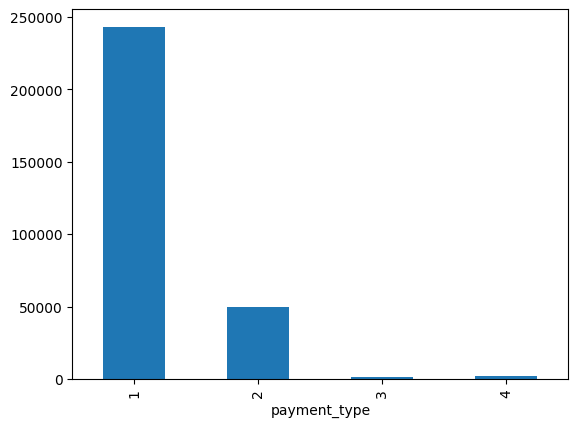

In [ ]:
# Analyse the distribution of different payment types (payment_type).

df_non_zero.groupby('payment_type').size().plot.bar()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd

os.chdir(r'C:\Users\shubh\Downloads\EDA Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones')

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

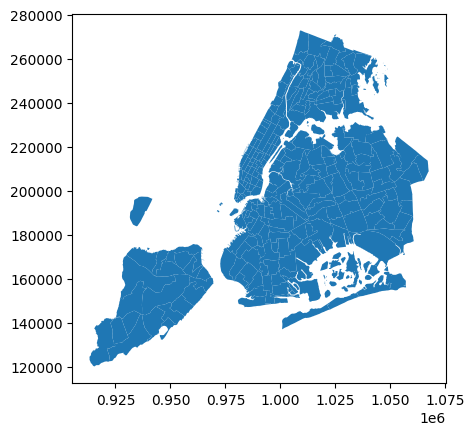

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID

final_df = pd.merge(left=df_non_zero, right=zones, how='left', left_on='PULocationID', right_on='LocationID')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

number_of_trips = final_df.groupby('LocationID').size().reset_index(name='total_trips')
number_of_trips.head(10)

LocationID  total_trips
0         1.0           41
1         3.0           10
2         4.0          387
3         5.0            1
4         6.0            6
5         7.0          134
6         8.0            1
7         9.0            6
8        10.0           80
9        11.0            4

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

zones_modified = pd.merge(left=zones, right=number_of_trips, how='left', on='LocationID')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

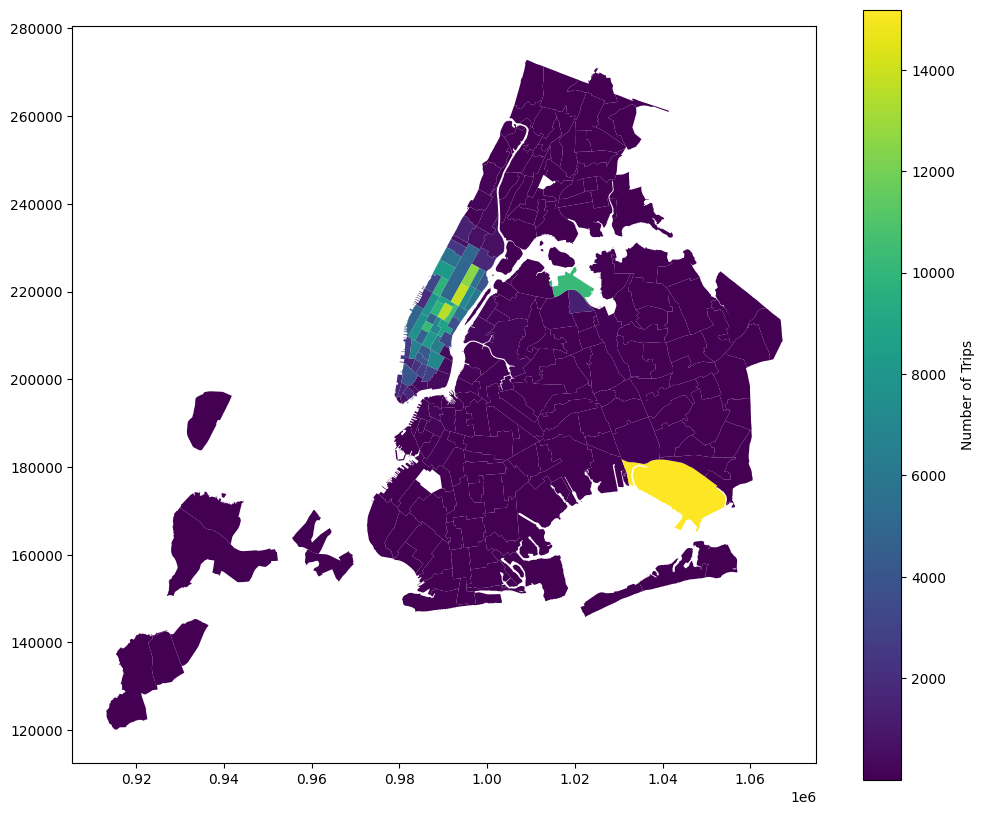

In [ ]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it

zones_modified.plot(column='total_trips', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "vertical"})
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones_modified.sort_values(by='total_trips', ascending=False)
zones_sorted.head(10)  # Display the top 10 zones with the most trips

OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
141       142    0.038176    0.000076           Lincoln Square East   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     total_trips  
131      15186.0  
236      13879.0  
160      13639.0  
235      12525.0  
161      10388.0  
137      10209.0  
185      10152.0  
229       9820.0  
141       9739.0  
169       8764.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

avg_duration = final_df.groupby(['PULocationID', 'DOLocationID', 'hour'])['trip_duration'].mean().reset_index()
avg_duration.rename(columns={'trip_duration': 'avg_trip_duration'}, inplace=True)

# Merge average duration with original data to get distance
merged_data = pd.merge(final_df, avg_duration, on=['PULocationID', 'DOLocationID', 'hour'])

# Calculate speed: distance / average duration
merged_data['speed_mph'] = merged_data['trip_distance'] / (merged_data['avg_trip_duration']/60)

# Calculate average speed for each route across all hours
slow_routes = merged_data.groupby(['PULocationID', 'DOLocationID', 'hour'])['speed_mph'].mean().reset_index()
slow_routes = slow_routes[slow_routes['PULocationID'] != slow_routes['DOLocationID']]
slow_routes = slow_routes.sort_values(by=['hour', 'speed_mph'])  # Sort by speed to find slow routes
slow_routes.head(10) # Display top 10 slowest routes

PULocationID  DOLocationID  hour  speed_mph
36266           158           234     0   0.245370
56201           237            75     0   0.351802
43787           170           239     0   0.538284
61126           249           100     0   0.544430
8423             68           264     0   0.546901
16085           101             5     0   0.604940
11268            79           162     0   0.700018
33829           148           107     0   1.245520
65524           265            72     0   2.904670
33410           146           145     0   4.235294

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

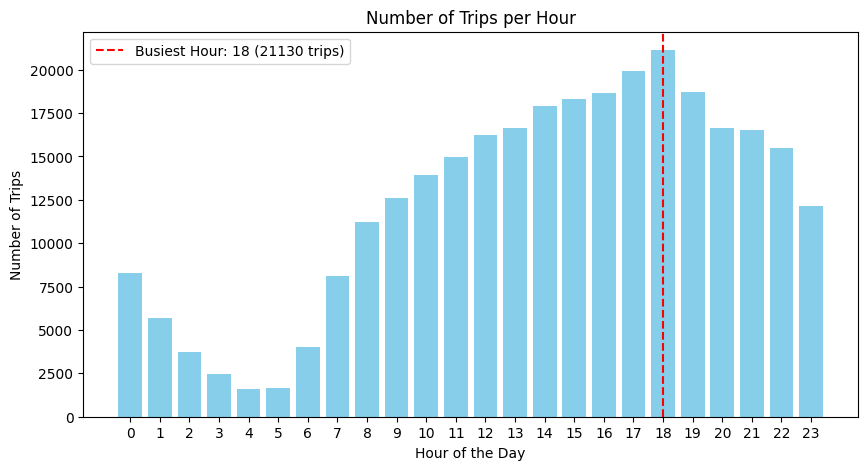

In [ ]:
# Visualise the number of trips per hour and find the busiest hour

trips_by_hour = merged_data["hour"].value_counts().sort_index()
busiest_hour = trips_by_hour.idxmax()
busiest_hour_count = trips_by_hour.max()

plt.figure(figsize=(10, 5))
plt.bar(trips_by_hour.index, trips_by_hour.values, color="skyblue")
plt.axvline(busiest_hour, color="red", linestyle="--", label=f"Busiest Hour: {busiest_hour} ({busiest_hour_count} trips)")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Hour")
plt.xticks(range(24))
plt.legend()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction = 0.1  # As per the second sampling condition

# Scale up the number of trips
trips_by_hour_scaled = trips_by_hour / sample_fraction

# Display the busiest hour's estimated number of trips
busiest_hour_scaled = busiest_hour_count / sample_fraction
busiest_hour, busiest_hour_scaled

(18, 211300.0)

In [ ]:
merged_data["hour"].value_counts().sort_index().sort_values(ascending=False).head(5) #Actual number of trips in the five busiest hours

hour
18    21130
17    19927
19    18731
16    18639
15    18320
Name: count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

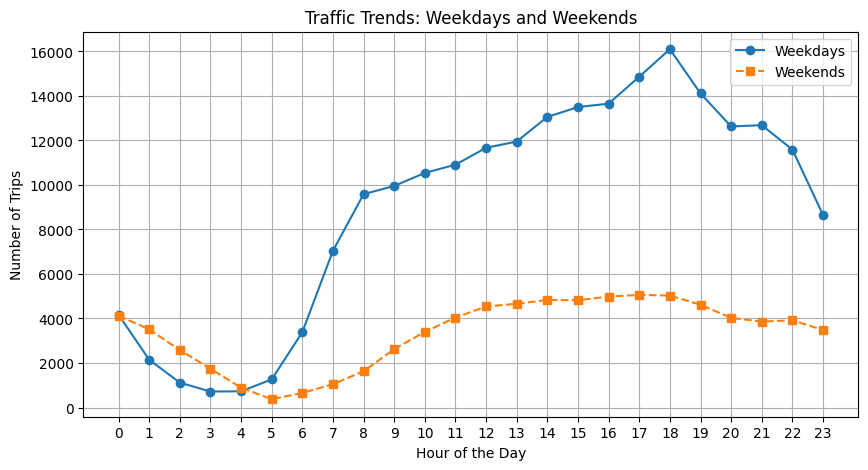

In [ ]:
# Compare traffic trends for the week days and weekends

merged_data["week_part"] = merged_data["days"].apply(lambda x: "Weekday" if x <= 5 else "Weekend")
traffic_trends = merged_data.groupby(["hour", "week_part"]).size().unstack()

plt.figure(figsize=(10, 5))
plt.plot(traffic_trends.index, traffic_trends["Weekday"], label="Weekdays", marker="o", linestyle="-")
plt.plot(traffic_trends.index, traffic_trends["Weekend"], label="Weekends", marker="s", linestyle="--")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Traffic Trends: Weekdays and Weekends")
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones

# Identify top 10 pickup and dropoff zones
top_pickup_zones = merged_data.groupby("zone")["PULocationID"].count().nlargest(10).index.tolist()
top_dropoff_zones = merged_data.groupby("zone")["DOLocationID"].count().nlargest(10).index.tolist()

# Filter data for these zones
df_top_pickup_zones = merged_data[merged_data["zone"].isin(top_pickup_zones)]
df_top_dropoff_zones = merged_data[merged_data["zone"].isin(top_dropoff_zones)]

# Compute hourly trends
pickup_trend = df_top_pickup_zones.groupby(["hour", "zone"])["PULocationID"].count().unstack()
dropoff_trend = df_top_dropoff_zones.groupby(["hour", "zone"])["DOLocationID"].count().unstack()

In [ ]:
pickup_trend.columns

Index(['JFK Airport', 'LaGuardia Airport', 'Lincoln Square East',
       'Midtown Center', 'Midtown East', 'Murray Hill',
       'Penn Station/Madison Sq West', 'Times Sq/Theatre District',
       'Upper East Side North', 'Upper East Side South'],
      dtype='object', name='zone')

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

top_pickup_zones = merged_data.groupby("zone")["PULocationID"].count().nlargest(10)
top_dropoff_zones = merged_data.groupby("zone")["DOLocationID"].count().nlargest(10)

bottom_pickup_zones = merged_data.groupby("zone")["PULocationID"].count().nsmallest(10)
bottom_droppff_zones = merged_data.groupby("zone")["DOLocationID"].count().nsmallest(10)

top_pickup_dropoff_ratio = top_pickup_zones.divide(top_dropoff_zones)
bottom_pickup_dropoff_ratio = bottom_pickup_zones.divide(bottom_droppff_zones)

In [ ]:
top_pickup_dropoff_ratio

zone
JFK Airport                     1.0
Upper East Side South           1.0
Midtown Center                  1.0
Upper East Side North           1.0
Midtown East                    1.0
LaGuardia Airport               1.0
Penn Station/Madison Sq West    1.0
Times Sq/Theatre District       1.0
Lincoln Square East             1.0
Murray Hill                     1.0
dtype: float64

In [ ]:
bottom_pickup_dropoff_ratio

zone
Arden Heights                1.0
Astoria Park                 1.0
Bay Terrace/Fort Totten      1.0
Douglaston                   1.0
Forest Park/Highland Park    1.0
Grymes Hill/Clifton          1.0
Inwood Hill Park             1.0
Mariners Harbor              1.0
Ocean Parkway South          1.0
Rikers Island                1.0
dtype: float64

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23,0,1,2,3,4,5]
df_night = merged_data[merged_data["hour"].isin(night_hours)]
high_pickup_night = df_night.groupby('zone')['PULocationID'].count().nlargest(10)
high_dropoff_night = df_night.groupby('zone')['DOLocationID'].count().nlargest(10)

In [ ]:
high_pickup_night

zone
East Village                    2586
JFK Airport                     2298
West Village                    2026
Clinton East                    1671
Lower East Side                 1526
Greenwich Village South         1435
Times Sq/Theatre District       1295
Penn Station/Madison Sq West    1154
East Chelsea                     969
Midtown South                    964
Name: PULocationID, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)

night_hours = [23,0,1,2,3,4,5]
df_night = merged_data[merged_data["hour"].isin(night_hours)]
df_day = merged_data[~(merged_data["hour"].isin(night_hours))]
night_revenue = df_night['total_amount'].sum().round(2)
day_revenue = df_day['total_amount'].sum().round(2)
print(f"The nighttime revenue is {night_revenue}.")
print(f"\nThe daytime revenue is {day_revenue}.")

The nighttime revenue is 1044483.74.

The daytime revenue is 7512123.96.


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

fare_per_mile = merged_data.groupby("passenger_count")[['fare_amount', 'trip_distance']].sum()

# Compute average fare per mile per passenger
fare_per_mile["avg_fare_per_mile_per_passenger"] = ((fare_per_mile["fare_amount"] / fare_per_mile["trip_distance"]) / fare_per_mile.index).round(2)

# Display results
print(fare_per_mile[["avg_fare_per_mile_per_passenger"]])

                 avg_fare_per_mile_per_passenger
passenger_count                                 
1.0                                         5.75
2.0                                         2.73
3.0                                         1.88
4.0                                         1.47
5.0                                         1.15
6.0                                         0.96


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

fare_per_mile_days = merged_data.groupby("days")[['fare_amount', 'trip_distance']].sum()
avg_fare_per_mile_days = (fare_per_mile_days['fare_amount'] / fare_per_mile_days['trip_distance'])
avg_fare_per_mile_days.sort_values(ascending=False)

days
4    5.929682
3    5.923883
2    5.824339
5    5.761198
6    5.732611
1    5.391129
7    5.282132
dtype: float64

In [ ]:
fare_per_mile_hour = merged_data.groupby("hour")[['fare_amount', 'trip_distance']].sum()
avg_fare_per_mile_hour = (fare_per_mile_hour['fare_amount'] / fare_per_mile_hour['trip_distance'])
avg_fare_per_mile_hour.sort_values(ascending=False)

hour
18    6.105167
11    6.102336
17    6.083845
12    6.035649
16    5.987381
15    5.979611
10    5.939697
13    5.910509
14    5.885567
9     5.852618
8     5.764438
19    5.750005
20    5.422365
21    5.368878
2     5.345904
22    5.341264
1     5.240101
7     5.229800
0     5.210699
3     5.206839
23    5.139131
6     4.657978
4     4.622331
5     4.545361
dtype: float64

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors

df_clean = merged_data[merged_data["trip_distance"] > 0].copy()

fare_per_mile_by_vendor_hour = df_clean.groupby(["VendorID", "hour"])[["fare_amount" ,"trip_distance"]].sum()

# Compute average fare per mile for each vendor at each hour
fare_per_mile_by_vendor_hour["avg_fare_per_mile"] = fare_per_mile_by_vendor_hour["fare_amount"] / fare_per_mile_by_vendor_hour["trip_distance"]

fare_per_mile_by_vendor_hour_pivot = fare_per_mile_by_vendor_hour["avg_fare_per_mile"].unstack(level=0)

# Compute overall average fare per mile per vendor
fare_per_mile_by_vendor = df_clean.groupby("VendorID").apply(lambda x: (x["fare_amount"] / x["trip_distance"]).mean())

# Display results
print(fare_per_mile_by_vendor)
print()
print(fare_per_mile_by_vendor_hour_pivot)

VendorID
1     8.066385
2    12.617218
6     9.236136
dtype: float64

VendorID         1         2         6
hour                                  
0         5.193146  5.070757  5.205479
1         5.025474  5.140303       NaN
2         5.149069  5.172538       NaN
3         5.023990  5.044295       NaN
4         4.641773  4.482087       NaN
5         4.523753  4.439792  3.333140
6         4.621857  4.625505  3.083700
7         5.138285  5.181766  3.793956
8         5.760980  5.695974  5.308521
9         5.816527  5.788771  6.334694
10        5.833509  5.910806  7.337209
11        6.047338  6.039682  5.362658
12        5.990912  5.966179  5.465263
13        5.844077  5.866119  5.627066
14        5.864037  5.809365  4.189277
15        5.919222  5.880311  5.986778
16        5.980894  5.899070  5.944879
17        6.106682  5.995658  4.016967
18        6.002398  6.029678       NaN
19        5.688345  5.684399  4.690743
20        5.402671  5.344074  4.250856
21        5.297857  5.296315  3.6

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


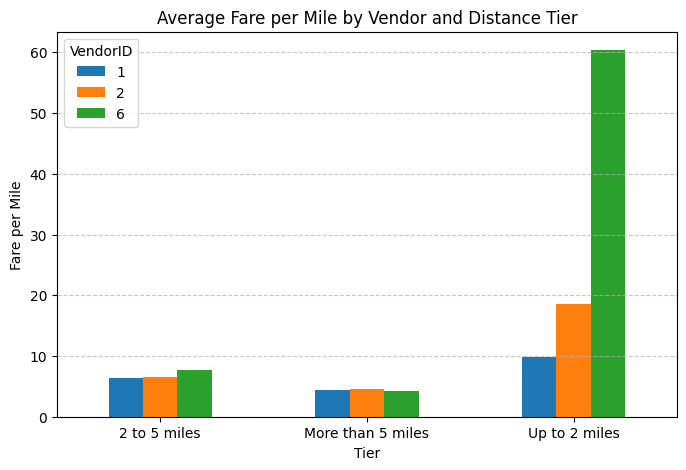

In [ ]:
# Defining distance tiers

# Calculate fare per mile
merged_data['fare_per_mile'] = merged_data['fare_amount'] / merged_data['trip_distance']

# Define tiers (excluding zero distances for tier 1)
tier1 = merged_data[(merged_data['trip_distance'] > 0) & (merged_data['trip_distance'] <= 2)].copy()
tier2 = merged_data[(merged_data['trip_distance'] > 2) & (merged_data['trip_distance'] <= 5)].copy()
tier3 = merged_data[merged_data['trip_distance'] > 5].copy()

# Add a 'Tier' column to each tier
tier1['Tier'] = 'Up to 2 miles'
tier2['Tier'] = '2 to 5 miles'
tier3['Tier'] = 'More than 5 miles'

combined_df = pd.concat([tier1, tier2, tier3])
results = combined_df.groupby(['Tier', 'VendorID'])['fare_per_mile'].mean().unstack()

results.plot(kind='bar', figsize=(8, 5))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.ylabel('Fare per Mile')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Create a new DataFrame with only required columns
tips_df = merged_data[['trip_distance', 'passenger_count', 'total_amount', 'tip_amount', 'hour']].copy()

# Calculate tip percentage
tips_df['tip_percentage'] = (tips_df['tip_amount'] / tips_df['total_amount']) * 100

# Create simple categories
tips_df['distance_category'] = pd.cut(tips_df['trip_distance'], [0, 2, 5, float('inf')], labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'])
tips_df['passenger_category'] = pd.cut(tips_df['passenger_count'], [0, 1, 3, float('inf')], labels=['1 passenger', '2-3 passengers', '4+ passengers'])
tips_df['time_category'] = pd.cut(tips_df['hour'], [0, 6, 12, 18, 24], labels=['Midnight to 6 AM', '6 AM to Noon', 'Noon to 6 PM', '6 PM to Midnight'], right=False)

# Calculate average tip percentages
print("Average Tip Percentage by Distance:")
print(tips_df.groupby('distance_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Passenger Count:")
print(tips_df.groupby('passenger_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Time of Pickup:")
print(tips_df.groupby('time_category')['tip_percentage'].mean())

# Find factors leading to low tips (<10%)
low_tip_factors = tips_df[tips_df['tip_percentage'] < 10]
print("\nFactors Leading to Low Tip Percentages:")
print(low_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category']).size().sort_values(ascending=False).head(10))

Average Tip Percentage by Distance:
distance_category
Up to 2 miles        12.127051
2 to 5 miles         12.230749
More than 5 miles    11.291017
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_category
1 passenger       12.074720
2-3 passengers    11.684394
4+ passengers     11.177919
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup:
time_category
Midnight to 6 AM    11.520321
6 AM to Noon        11.811933
Noon to 6 PM        11.807525
6 PM to Midnight    12.336573
Name: tip_percentage, dtype: float64

Factors Leading to Low Tip Percentages:
distance_category  passenger_category  time_category   
Up to 2 miles      1 passenger         Noon to 6 PM        16072
                                       6 PM to Midnight    11879
                                       6 AM to Noon        10142
2 to 5 miles       1 passenger         6 PM to Midnight     6755
                                       Noon to 6 PM         6

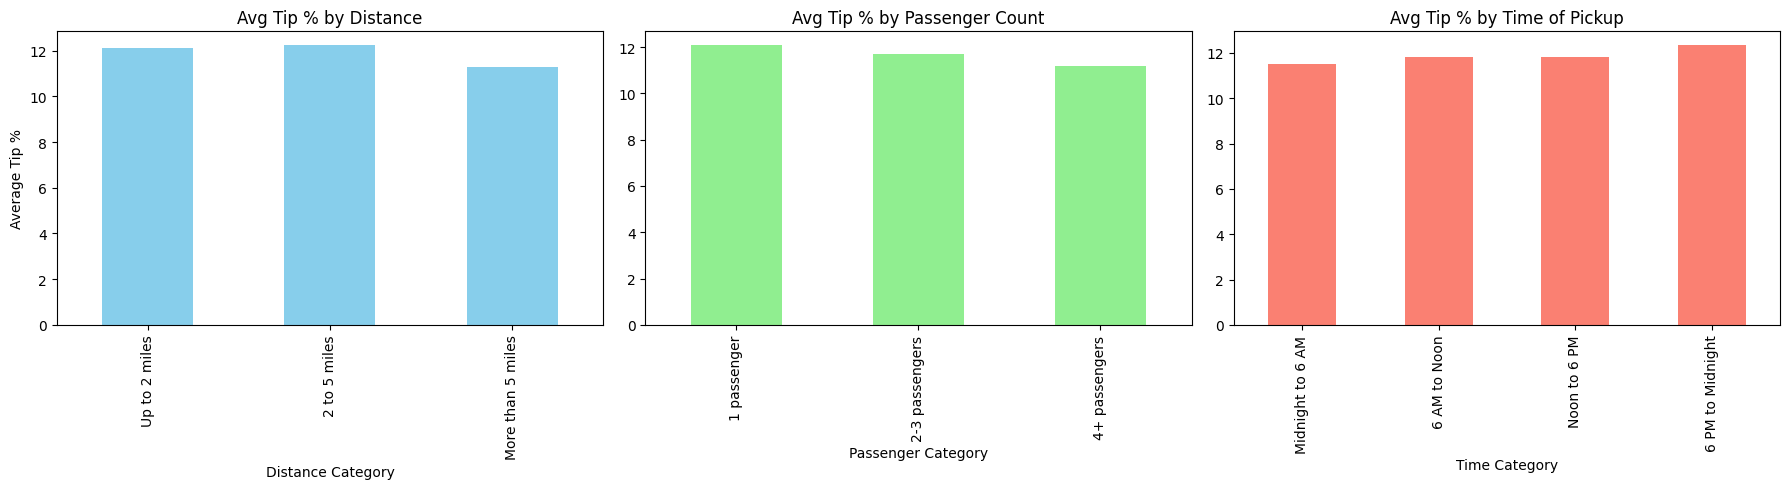

In [ ]:
avg_tip_by_distance = tips_df.groupby('distance_category')['tip_percentage'].mean()
avg_tip_by_passenger = tips_df.groupby('passenger_category')['tip_percentage'].mean()
avg_tip_by_time = tips_df.groupby('time_category')['tip_percentage'].mean()

# Create a figure with three subplots (side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot average tip percentage by distance category
avg_tip_by_distance.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Avg Tip % by Distance')
axes[0].set_xlabel('Distance Category')
axes[0].set_ylabel('Average Tip %')

# Plot average tip percentage by passenger count
avg_tip_by_passenger.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Avg Tip % by Passenger Count')
axes[1].set_xlabel('Passenger Category')

# Plot average tip percentage by time of pickup
avg_tip_by_time.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Avg Tip % by Time of Pickup')
axes[2].set_xlabel('Time Category')

plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
#Not doing it since it says OPTIONAL.


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

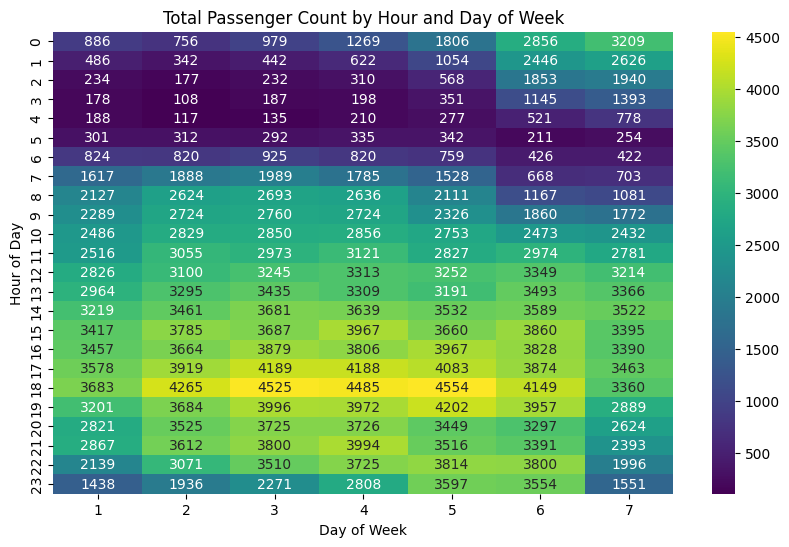

In [ ]:
# See how passenger count varies across hours and days

passenger_df = merged_data[['passenger_count','hour','days']].copy()

grouped = passenger_df.groupby(['days', 'hour'])['passenger_count'].sum().reset_index()

# Pivot the grouped data (rows: hour, columns: day of week)
pivot_table = grouped.pivot(index='hour', columns='days', values='passenger_count')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='viridis')
plt.title('Total Passenger Count by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones

merged_data.pivot_table(index ='zone', values= 'passenger_count', aggfunc= sum).sort_values(by='passenger_count', ascending=False).head(20)

passenger_count
zone                                         
JFK Airport                           22711.0
Midtown Center                        18700.0
Upper East Side South                 18643.0
Upper East Side North                 16939.0
Times Sq/Theatre District             14534.0
LaGuardia Airport                     13993.0
Midtown East                          13714.0
Penn Station/Madison Sq West          13709.0
Lincoln Square East                   13499.0
Midtown North                         12051.0
Murray Hill                           11787.0
Upper West Side South                 11081.0
Clinton East                          10990.0
East Chelsea                          10858.0
Union Sq                              10850.0
East Village                           9835.0
Midtown South                          9637.0
Lenox Hill West                        9403.0
West Village                           9181.0
Gramercy                               8511.0

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# 1. Create a new column with average passenger count per zone
merged_data['avg_passenger_count'] = merged_data.groupby('zone')['passenger_count'].transform('mean')

# 2. Create a separate DataFrame with unique zones and their average passenger count
zone_avg = merged_data[['zone', 'avg_passenger_count']].drop_duplicates().sort_values(by='avg_passenger_count', ascending=False).reset_index(drop=True).round(2)
zone_avg.dropna(axis=0, inplace=True)
zone_avg.head(10)

zone  avg_passenger_count
0           Inwood Hill Park                 3.00
1            Manhattan Beach                 2.17
2              Rikers Island                 2.00
3    Arrochar/Fort Wadsworth                 2.00
4                   Red Hook                 1.91
5               Battery Park                 1.75
6  Springfield Gardens South                 1.69
7            Randalls Island                 1.67
8         Murray Hill-Queens                 1.67
9            Oakland Gardens                 1.67

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?

# Total number of trips
total_trips = len(merged_data)

# 1. Count how often each extra/surcharge is applied:
# (Assuming a charge is applied when its value is greater than 0)

# Extra charge frequency
extra_applied = (merged_data['extra'] > 0).sum()
print(f"Extra charge applied in {extra_applied} of {total_trips} trips ({extra_applied/total_trips:.2%}).")

# Congestion surcharge frequency
congestion_applied = (merged_data['congestion_surcharge'] > 0).sum()
print(f"Congestion surcharge applied in {congestion_applied} of {total_trips} trips ({congestion_applied/total_trips:.2%}).")

# Improvement surcharge frequency
improvement_applied = (merged_data['improvement_surcharge'] > 0).sum()
print(f"Improvement surcharge applied in {improvement_applied} of {total_trips} trips ({improvement_applied/total_trips:.2%}).")

# 2. Analyse extra charges by time (hour)
hourly_extra = merged_data.groupby('hour').apply(lambda x: (x['extra'] > 0).sum())
print("\nHourly extra charge counts:")
print(hourly_extra)

# 3. Analyse extra charges by pickup zones
pickup_zone_extra = merged_data.groupby('PULocationID').apply(lambda x: (x['extra'] > 0).sum())
print("\nTop 10 Pickup Zones by extra charge counts:")
print(pickup_zone_extra.sort_values(ascending=False).head(10))

# 4. Analyse extra charges by dropoff zones
dropoff_zone_extra = merged_data.groupby('DOLocationID').apply(lambda x: (x['extra'] > 0).sum())
print("\nTop 10 Dropoff Zones by extra charge counts:")
print(dropoff_zone_extra.sort_values(ascending=False).head(10))


Extra charge applied in 179957 of 296490 trips (60.70%).
Congestion surcharge applied in 275084 of 296490 trips (92.78%).
Improvement surcharge applied in 296476 of 296490 trips (100.00%).

Hourly extra charge counts:
hour
0      7724
1      5310
2      3481
3      2288
4      1319
5      1308
6      1264
7      2359
8      3354
9      3698
10     4316
11     4451
12     4844
13     4956
14     5391
15     5542
16    14088
17    15546
18    16715
19    14789
20    15560
21    15648
22    14654
23    11352
dtype: int64

Top 10 Pickup Zones by extra charge counts:
PULocationID
138    10093
161     8650
237     7941
132     7488
236     6583
230     6481
162     6429
142     6075
186     5894
163     5497
dtype: int64

Top 10 Dropoff Zones by extra charge counts:
DOLocationID
236    7473
237    6891
161    5877
170    5279
230    5251
239    5143
142    5008
141    4929
48     4702
162    4627
dtype: int64


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Our analysis of the taxi trip data has uncovered several actionable insights that can drive operational improvements and revenue optimization.

- **Demand Patterns by Time and Day:**  
   We observed that demand peaks around the early evening hours—particularly around 6 PM. Weekday patterns indicate consistent demand during business commute hours, while weekends show distinct surges during late-night or early morning periods. This variation suggests that routing and dispatching strategies need to be highly adaptive:  
- **Routing & Dispatching Optimization:** By integrating real-time data with historical demand patterns, dispatch centers can predict the upcoming high-demand periods and adjust their routing algorithms accordingly. For instance, dispatching more cabs during the evening rush can alleviate wait times and improve service reliability, while off-peak periods could be used for strategic repositioning.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Zone-Specific Insights:**  
   Our spatial analysis indicates that certain pickup and dropoff zones consistently register higher trip counts and, in many cases, a higher frequency of extra charges and surcharges. These areas likely represent business districts or regions with unique traffic conditions:  
   - **Strategic Positioning:** Cabs should be proactively positioned in these high-demand zones. By analyzing the trends across hours, days, and even months, companies can develop a dynamic repositioning strategy. For example, during weekday evenings, a higher concentration of vehicles near popular office areas or transit hubs can ensure that supply meets the surge in demand. Conversely, on weekends, more vehicles might be allocated near entertainment or leisure districts.
   - **Operational Efficiency:** Adjustments to the dispatching protocol that consider both spatial and temporal demand can reduce idle time, minimize fuel costs, and improve overall operational efficiency.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

 **Pricing Strategy Adjustments:**  
   The presence of extra charges and surcharges—especially those that spike during periods of high demand—offers clues about market pressure points and operational challenges. To maximize revenue while remaining competitive, a flexible, data-driven pricing strategy is essential:
   - **Dynamic Pricing:** Implement surge pricing during identified peak hours and zones. This adjustment would not only help balance supply and demand but also capture additional revenue during periods of operational stress.
   - **Competitive Rate Management:** While surge pricing can drive revenue, it is critical to monitor competitor rates closely. A dynamic pricing model that takes into account both the demand data and competitor pricing will help maintain market competitiveness. This model can also factor in special events or weather conditions that might influence customer behavior.
   - **Customer Perception:** Transparent communication about pricing changes and ensuring that base rates remain reasonable will be key to retaining customer trust while optimizing revenue.
